**TODO:**
- use cases
- formal description
- choose dataset
- N classes => N classificators
- create graphs


- (?) Receiver Operating Characteristic
- (?) Maximum Likelihood Estimation

# Logistische Regression mit Python

Ein ähnliches Konzept wurde im 2. Blogbeitrag als "lineares Modell für Klassifikation" vorgestellt. Dieses Konzept wird in diesem Blogbeitrag erweitert.

Es handelt sich um die logistische Regression. Das ist ein Modell für Regressionsanalyse, wobei die Abhängige Variable kategorisch ist. Das heißt, wir können dieses Modell für Klassifikation verwenden. Ein weiterer Vorteil der logistischen Regression ist, dass sie liefert auch die Wahrscheinlichkeit, dass eine Stichprobe zur ausgewählten Klasse gehört.

## Praktische Beispiele

- was
- was anders
**TODO**

## Formale Definition

Wie bei der linearen Regression sucht man geeignete Koeffiziente (*w*), so dass man das Modell mit der folgenden Formell beschreiben kann.

`y = w0 + w1*x1 + w2*x2 + ... + wn*xn`

Das liefert aber eine Zahl, die beliebig groß oder klein sein kann und gar nichts mit Wahrscheinlichkeiten zu tun hat. Wir brauchen eine Zahl zwischen 0 und 1 und zur Hilfe kommt hier die logistische Funktion. 

### Logistische Funktion

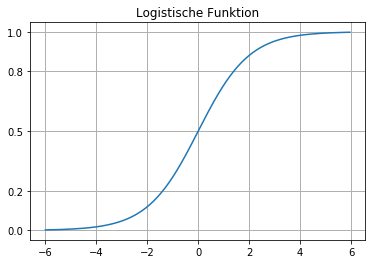

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def logistic(x):
    return 1 / (1 + np.exp(-x))

# logistische Funktion plotten
t = np.arange(-6,6,0.05)
plt.plot(t, logistic(t))
plt.yticks([0, 0.2, 0.5, 0.8, 1])
plt.grid(linewidth=1)
plt.title("Logistische Funktion")
plt.show()

Die logistische Funktion ist als `1 / 1 + e^-z` definiert, wobei `e` die Eulersche Zahl ist (~2,71828...). Diese Zahl ist die Basis des natürlichen Logarithmus.

Es ist zu sehen, dass die Ausgabe der logistischen Funktion zwischen 0 und 1 beschränkt ist. Interessant ist auch, dass bei `z=0`, der Ausgabewert genau `0.5` ist.

Jetzt kann man das `z` in der Formell durch `w0 + w1*x1 + w2*x2 + ... + wn*xn` ersetzen, und so bekommen wir das Modell der logistischen Regression. 

Die Anpassung der Gewichtungen *w* ist mathematisch aufwänding und außer der Umfang dieses Blogbeitrags. Stattdessen, wird hier die Implementierung und Anwendung von logistischen Regression gezeigt. 

## Datensatz

Wir werden den [Irisdatensatz](https://en.wikipedia.org/wiki/Iris_flower_data_set) hier verwenden, den man mit *scikit-learn* holen kann. Danach werden wir ihn in Trainings- und Testdaten aufteilen.

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

data = load_iris()

# Trainings- und Testdaten erzeugen
train_x, test_x, train_y, test_y = train_test_split(data.data, data.target)

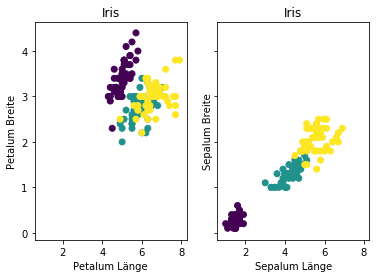

In [3]:
import matplotlib.pyplot as plt

# Datensatz plotten
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True)
ax1.scatter(data.data[:, 0], data.data[:, 1], c=data.target)
ax1.set(title="Iris", ylabel='Petalum Breite', xlabel='Petalum Länge')
 
ax2.scatter(data.data[:, 2], data.data[:, 3], c=data.target)
ax2.set(title="Iris", ylabel='Sepalum Breite', xlabel='Sepalum Länge')
plt.setp(ax2.get_yticklabels(), visible=False)
plt.show()

## Implementierung

Man kann ein ganz einfaches Modell mit `sklearn.linear_model.LogisticRegression` erstellen. Nachdem es angepasst wird, kann man die Testdaten klassifizieren. 

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression()
clf.fit(train_x, train_y)

# Klassifikationsgüte berechnen
print("Genauigkeit: %f" % accuracy_score(test_y, clf.predict(test_x)))

Genauigkeit: 0.973684


Diese Methode liefert uns aber wenige Erkenntnisse über die Funktionsweise der logistischen Regression. 

Die einfachste Form dieses Modells ist die binäre logistische Regression. Das heißt man kann nur zwischen zwei Klassen unterscheiden. Falls mehrere Klassen vorhanden sind, dann soll man für jede Klasse einen Klassifikator erstellen, der nur überprüfen kann, ob eine Stichprobe zu dieser Klasse gehört oder nicht. 

`sklearn` kann auch das implizit erledigen, falls man `multiclass='ovr'` als Konstruktorparamter eingibt. 

**TODO: Continue**

